# Investigating ATC's Hate Speech Dataset

In [60]:
# Helper

# Connect to DB

In [14]:
import pandas as pd
import sqlite3

con = sqlite3.connect("atc-analysis.db")
cur = con.cursor()


# Helper

In [ ]:
def countPosts(cur, attribute, minScore, maxScore):
    query = f"SELECT COUNT(*) FROM Analysis WHERE {attribute} > ? AND {attribute} <= ?"
    result = cur.execute(query, (minScore, maxScore)).fetchone()

    return result[0]



# Bargraph by score Interval

In [ ]:

delta = 0.01
numberOfIntervals = 10
startScore = 0.90
    
attributes = ["racism", "religious", "sexism", "sexualOrientation", "nonHateful"]
language = "de"

data = []

for index in range(0, numberOfIntervals):
    minScore = round(100*(startScore + index*delta))/100.0
    maxScore = round(100*(minScore + delta))/100.0

    dataRow = [minScore, maxScore]

    for attribute in attributes:

        numberOfPosts = countPosts(cur=cur, attribute=attribute, minScore=minScore, maxScore=maxScore)
        dataRow.append(numberOfPosts)
        print(f"{attribute},{minScore:.3f}, {maxScore:.3f}, {numberOfPosts}" )

    data.append(dataRow)

columnNames = ['minScore', 'maxScore']
columnNames.extend(attributes)
df = pd.DataFrame(data, columns=columnNames)
print(df.head((100)))

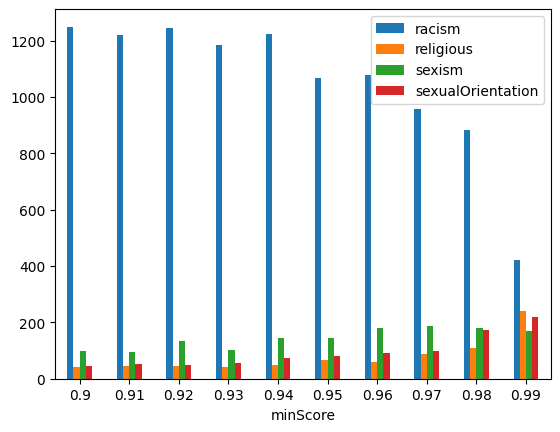

In [59]:
import matplotlib
ax = df.plot.bar(rot=0, x='minScore', y=["racism", "religious", "sexism", "sexualOrientation"])

# Cummulative graph

In [ ]:
def countPostsWithMinScore(cur, attribute, minScore, language):
    query = f"SELECT COUNT(*) FROM Analysis WHERE {attribute} >= ? AND language LIKE '%{language}%'"
    result = cur.execute(query, (minScore,)).fetchone()

    return result[0]

startScore = 0.90
numberOfSteps = 100
    
attributes = ["racism", "religious", "sexism", "sexualOrientation", "nonHateful"]
language = "en"

delta = (1.0-startScore)/numberOfSteps

data = []

for index in range(0, numberOfSteps+1):
    minScore = startScore + index*delta

    dataRow = [minScore]

    postSum = 0

    for attribute in attributes:

        numberOfPosts = countPostsWithMinScore(cur=cur, attribute=attribute, minScore=minScore, language=language)
        dataRow.append(numberOfPosts)
        postSum += numberOfPostsm
        #print(f"{attribute},{minScore:.3f}, {numberOfPosts}" )

    dataRow.append(postSum)
    data.append(dataRow)

columnNames = ['minScore']
columnNames.extend(attributes)
cumDF = pd.DataFrame(data, columns=columnNames)
print(cumDF.head((100)))

    minScore  racism  religious  sexism  sexualOrientation  nonHateful
0      0.900    6298        483    1320                737       88118
1      0.901    6257        483    1313                735       88040
2      0.902    6206        480    1303                730       87964
3      0.903    6160        475    1293                727       87888
4      0.904    6108        474    1283                727       87826
..       ...     ...        ...     ...                ...         ...
95     0.995      46        149      73                 95       59811
96     0.996      13        130      46                 68       55990
97     0.997       2         98      23                 39       49992
98     0.998       0         66       7                 19       37257
99     0.999       0         32       0                  0           0

[100 rows x 6 columns]


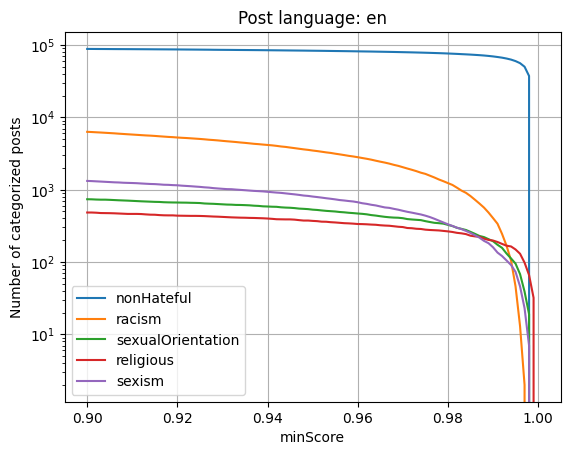

In [107]:
cumDF.head()
import matplotlib
ax = cumDF.plot.line(rot=0, x='minScore', y=["nonHateful", "racism", "sexualOrientation", "religious", "sexism", ], grid=True, logy=True, ylabel="Number of categorized posts", title=f"Post language: {language}")
